In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
#This curve gives a good idea of Overfitting or Underfitting between Training and Validation Data
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, train_color = "blue", val_color = "green"):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y,
        cv=cv,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy',
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_mean, label="Training accuracy", color= train_color, marker='o')
    plt.plot(train_sizes, val_mean, label="Validation accuracy", color= val_color, marker='o')
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

#Visually shows statistics of FPs, FNs, TPs, TNs
def confusion_bar(cm, title, colors):
    tn, fp, fn, tp = cm.ravel()
    categories = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    values = [tn, fp, fn, tp]

    plt.figure(figsize=(8, 5))
    bars = plt.bar(categories, values, color=colors)
    plt.title(title)
    plt.ylabel('Count')
    plt.ylim(0, max(values) * 1.1)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + max(values) * 0.02, int(yval), ha='center', va='bottom')

    plt.show()

In [3]:
# Step 1: Load Data Set
df = pd.read_csv('https://raw.githubusercontent.com/pylabview/CS_534_Intro_2_Artificial_Intelligence/refs/heads/main/group_project/Phase_2_Project_Proposal/mlp_model/Split_Data/Uncleaned/CEAS_08_train.csv')



In [4]:
#Step 2: Define Input and Output values and Convert text to TF-IDF Vectors
possible_cols = ['subject', 'body', 'sender', 'urls']

# Filter only columns that actually exist in df
cols_to_concat = [col for col in possible_cols if col in df.columns]

# Text preprocessing, combining multiple string columns
df['text'] = df[cols_to_concat].fillna('').astype(str).agg(' '.join, axis=1)
y = df['label'].values

In [5]:
# Step 3: Train/val/test split, 80% Train/Val Data, 20% Test Data
X_train_val_texts, X_test_texts, y_train_val, y_test = train_test_split(df['text'], y, test_size=0.2, random_state=42, stratify=y)
X_train_texts, X_val_texts, y_train, y_val = train_test_split(X_train_val_texts, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)


In [6]:
# Step 4: Fit TF-IDF on Training, Validation and Test text
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(X_train_texts)
X_val = vectorizer.transform(X_val_texts)
X_test = vectorizer.transform(X_test_texts)


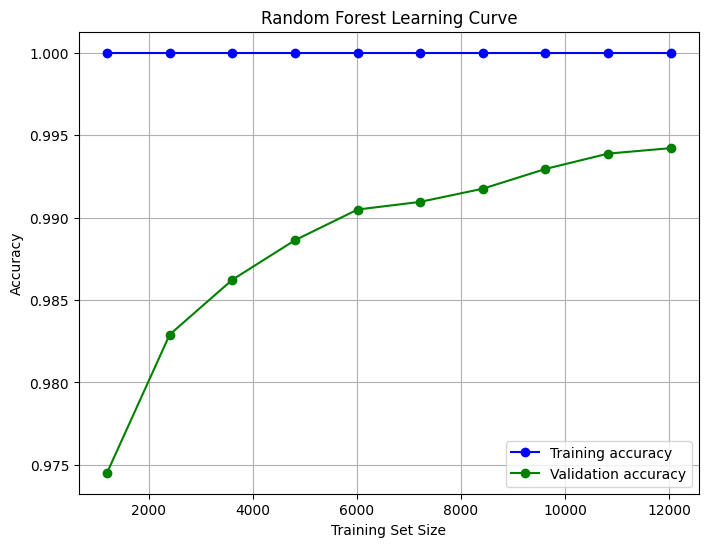

Random Forest:
Training Accuracy 1.0
Validation Accuracy: 0.9964086193136472
Test Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2216
           1       0.99      0.99      0.99      2796

    accuracy                           0.99      5012
   macro avg       0.99      0.99      0.99      5012
weighted avg       0.99      0.99      0.99      5012

Test Accuracy: 0.9924181963288109


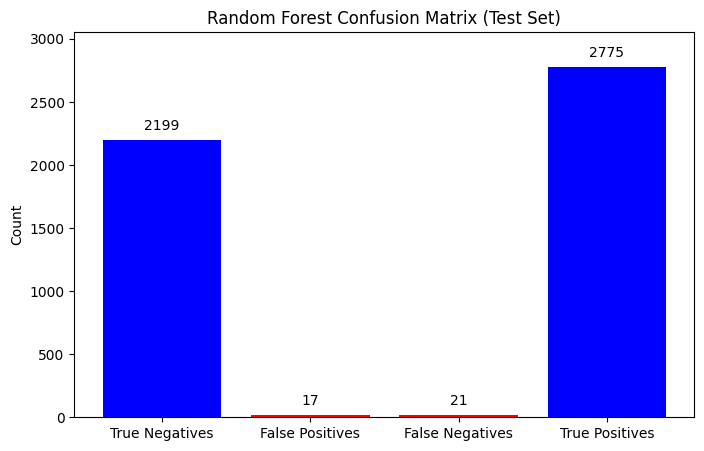

In [7]:
# Step 5: Random Forest Model and Evaluation metrics
rf_model = RandomForestClassifier(random_state=42)
plot_learning_curve(rf_model, X_train, y_train, title="Random Forest Learning Curve")
rf_model.fit(X_train, y_train)
print("Random Forest:")

#Training metrics
train_rf_predictions = rf_model.predict(X_train)
print("Training Accuracy",accuracy_score(y_train, train_rf_predictions))

#Validation metrics
val_rf_predictions = rf_model.predict(X_val)
print("Validation Accuracy:",accuracy_score(y_val, val_rf_predictions))

#Testing metrics, evaluates the accuracy of the model
test_rf_predictions = rf_model.predict(X_test)
print("Test Classification Report\n",classification_report(y_test,test_rf_predictions))
print("Test Accuracy:",accuracy_score(y_test, test_rf_predictions))

#plot confusion matrix to visualize metrics
rf_cm = confusion_matrix(y_test, test_rf_predictions)
confusion_bar(rf_cm, 'Random Forest Confusion Matrix (Test Set)', colors=['blue','red', 'red', 'blue'])


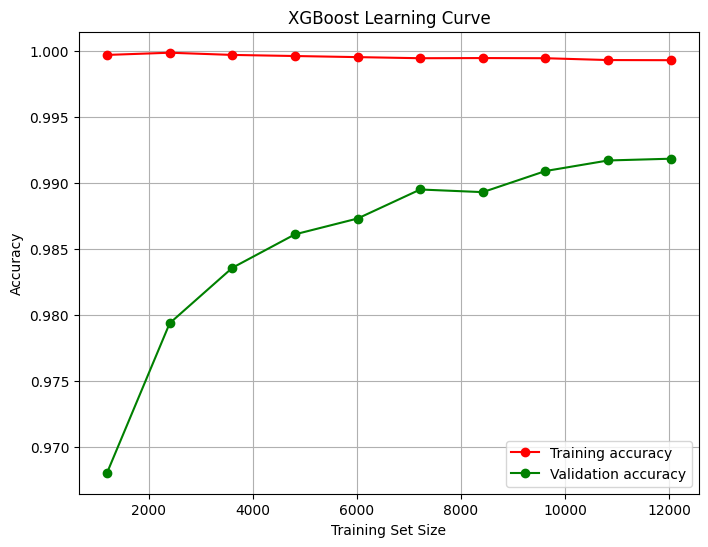

XGBoost:
Training Accuracy 0.9991352933351071
Validation Accuracy: 0.994413407821229
Test Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2216
           1       0.99      1.00      0.99      2796

    accuracy                           0.99      5012
   macro avg       0.99      0.99      0.99      5012
weighted avg       0.99      0.99      0.99      5012

Accuracy: 0.9932162809257782


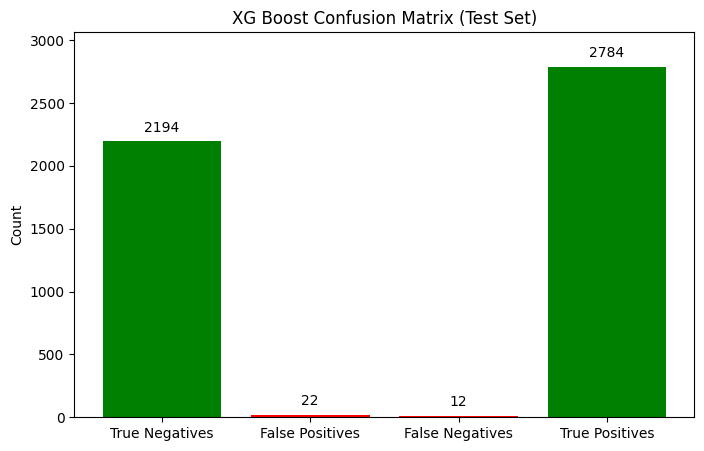

In [8]:
# Step 6: XG Boost Model and Evaluation metrics
xgb_model = XGBClassifier(random_state=42)
plot_learning_curve(xgb_model, X_train, y_train, title="XGBoost Learning Curve", train_color =  "red")
xgb_model.fit(X_train, y_train)
print("XGBoost:")

# Training metrics
train_xgb_predictions = xgb_model.predict(X_train)
print("Training Accuracy", accuracy_score(y_train, train_xgb_predictions))

# Validation metrics
val_xgb_predictions = xgb_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_xgb_predictions))

#Testing metrics, evaluates the accuracy of the model
test_xgb_predictions = xgb_model.predict(X_test)
print("Test Classification Report\n",classification_report(y_test,test_xgb_predictions))
print("Accuracy:",accuracy_score(y_test,test_xgb_predictions))

# plot confusion matrix to visualize metrics
xgb_cm = confusion_matrix(y_test, test_xgb_predictions)
confusion_bar(xgb_cm, 'XG Boost Confusion Matrix (Test Set)', colors=['green', 'red', 'red', 'green'])
